KMeans

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [52]:
# 데이터 생성
n_sample = 300
n_clusters = 3

In [53]:
x, y = make_blobs(n_samples = n_sample, 
                  centers = n_clusters, 
                  random_state = 42)

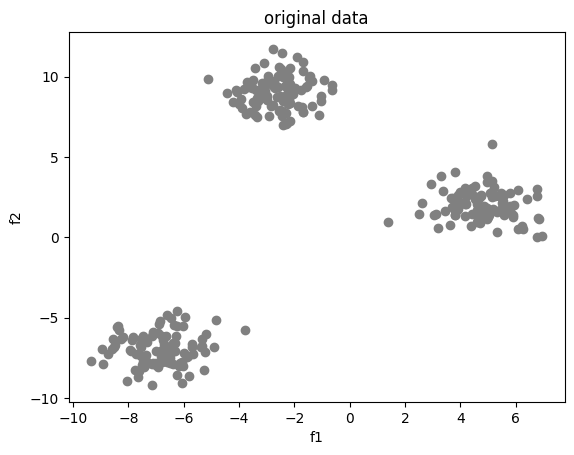

In [54]:
# 그래프
plt.scatter(x[:, 0], x[:, 1], c='grey', label='original data')
plt.title('original data')
plt.xlabel('f1')
plt.ylabel('f2')
plt.show()

In [55]:
# KMeans 객체 생성 -> 학습
kmeans = KMeans(n_clusters = 3, random_state = 42)

In [56]:
# 학습
cluster_labels = kmeans.fit_predict(x)

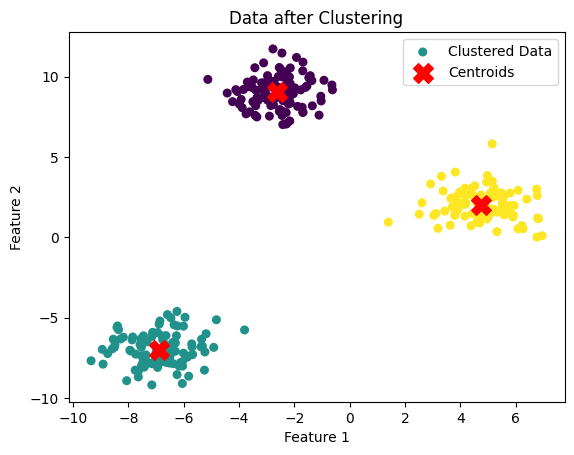

In [57]:
# 군집화 결과 시각화
# 각 데이터 포인트의 클러스터에 따라 색을 지정
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', s=30,
label="Clustered Data")
# 클러스터 중심 시각화
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
s=200, c='red', label="Centroids", marker='X')
plt.title("Data after Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

Text(0, 0.5, 'result')

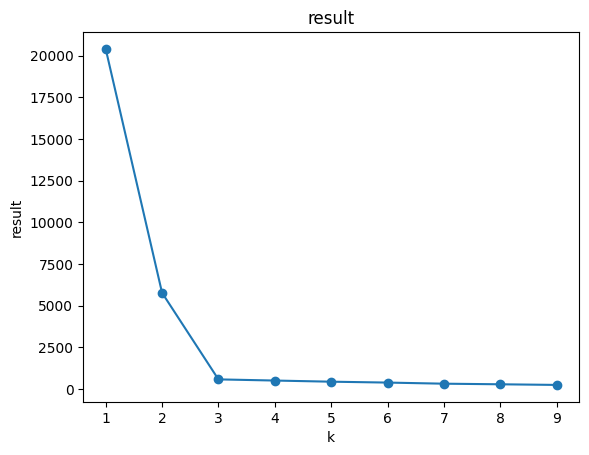

In [58]:
# 최적의 K 찾기
result = []

for k in range(1, 10):
    kmeans_temp = KMeans(n_clusters = k, random_state = 42)
    kmeans_temp.fit_predict(x)
    result.append(kmeans_temp.inertia_)

plt.plot(range(1,10), result, marker='o')
plt.title('result')

plt.xlabel('k')
plt.ylabel('result')

In [59]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [60]:
# 실루엣 스코어
sil_avg = silhouette_score(x, cluster_labels)
print(sil_avg)

0.8480303059596955


In [61]:
# 시각화를 위한 점수 계산
sil_values = silhouette_samples(x, cluster_labels)
print(sil_values)

[0.90593228 0.90295138 0.78292932 0.82801009 0.85347199 0.87164904
 0.87660124 0.87599826 0.87967189 0.85542272 0.8185558  0.87259676
 0.74387596 0.84157115 0.90743902 0.87272287 0.87580064 0.72626456
 0.86269038 0.78265318 0.78367684 0.88236857 0.86744598 0.91367619
 0.87177917 0.84973102 0.88991326 0.69411153 0.86247358 0.84701361
 0.85559028 0.86435444 0.88923506 0.81530708 0.84205606 0.84407722
 0.89049865 0.87854612 0.90341598 0.76522292 0.84764565 0.8725714
 0.91062018 0.81940318 0.8287758  0.82800398 0.91293113 0.86613733
 0.9101851  0.81830486 0.87279139 0.85655332 0.90111562 0.76870605
 0.87629642 0.52748913 0.90894375 0.83452366 0.86343982 0.86125249
 0.88918749 0.76979529 0.86487455 0.69836723 0.88372903 0.82959834
 0.85491415 0.88631591 0.8734638  0.86485178 0.85190407 0.85010535
 0.90260065 0.86305493 0.80711153 0.90990924 0.85777116 0.85024895
 0.87568057 0.85626803 0.86869093 0.86376756 0.89694868 0.85592685
 0.86287428 0.88174667 0.87343813 0.75129446 0.81999592 0.82172

In [62]:
# 시각화 준비
y_lower = 10
for i in range(4): # 각 클러스터에 대해 반복
    ith_cluster_silhouette_values = sil_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
# 클러스터별 막대 그리기
plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values)
plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # 클러스터 번호
y_lower = y_upper + 10 # 다음 클러스터로 이동

# 그래프 설정
plt.axvline(x=sil_avg, color="red", linestyle="--") # 평균 실루엣 점수
plt.title("Silhouette Plot for K-Means Clustering")
plt.xlabel("Silhouette Score")
plt.ylabel("Cluster")
plt.show()

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [64]:
iris = load_iris()

x = iris.data      # 특성 : 4개
y = iris.target    # 0, 1, 2

In [65]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [66]:
pca = PCA(n_components=2)

In [67]:
x_pca = pca.fit_transform(x_scaled)

In [68]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


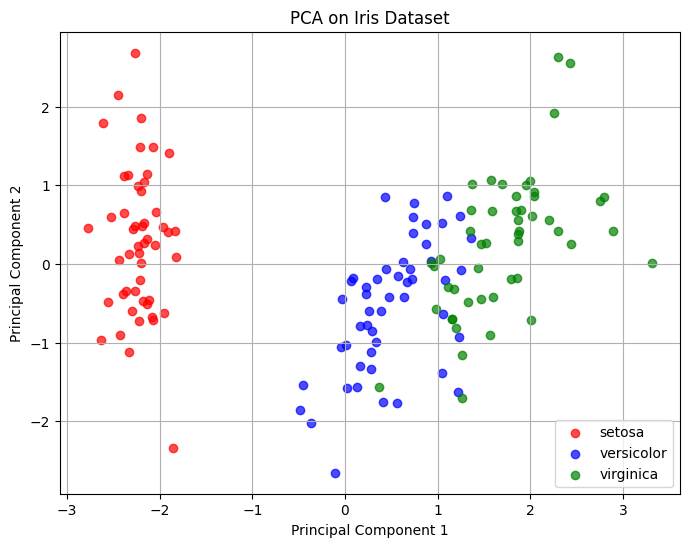

In [69]:
# PCA 결과 시각화
# - 두 개의 주성분을 사용해 데이터를 2D 플롯으로 시각화
plt.figure(figsize=(8, 6))

for target, color, label in zip([0, 1, 2], ['red', 'blue', 'green'],
iris.target_names):
    plt.scatter(x_pca[y == target, 0], # 첫 번째 주성분
                x_pca[y == target, 1], # 두 번째 주성분
                color=color, label=label, alpha=0.7)
    
plt.title('PCA on Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()
plt.show()

In [70]:
# Isolation Forest : 이상치 탐지
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

In [71]:
np.random.seed(42)

In [72]:
# 정상 100개, 이상 10개 => 2차원
normal_traffic = np.random.normal(loc=50, scale=10, size=(100,2))
print(normal_traffic)
ano_traffic = np.random.uniform(low=100, high=150, size=(10,2))


[[54.96714153 48.61735699]
 [56.47688538 65.23029856]
 [47.65846625 47.65863043]
 [65.79212816 57.67434729]
 [45.30525614 55.42560044]
 [45.36582307 45.34270246]
 [52.41962272 30.86719755]
 [32.75082167 44.37712471]
 [39.8716888  53.14247333]
 [40.91975924 35.87696299]
 [64.65648769 47.742237  ]
 [50.67528205 35.75251814]
 [44.55617275 51.1092259 ]
 [38.49006423 53.75698018]
 [43.9936131  47.0830625 ]
 [43.98293388 68.52278185]
 [49.86502775 39.42289071]
 [58.22544912 37.7915635 ]
 [52.08863595 30.40329876]
 [36.71813951 51.96861236]
 [57.3846658  51.71368281]
 [48.84351718 46.98896304]
 [35.2147801  42.80155792]
 [45.39361229 60.57122226]
 [53.4361829  32.36959845]
 [53.24083969 46.1491772 ]
 [43.23078    56.11676289]
 [60.30999522 59.31280119]
 [41.60782477 46.90787624]
 [53.31263431 59.75545127]
 [45.20825762 48.14341023]
 [38.93665026 38.03793376]
 [58.12525822 63.56240029]
 [49.27989878 60.03532898]
 [53.61636025 43.54880245]
 [53.61395606 65.38036566]
 [49.64173961 65.64643656]
 

In [73]:
traffic_data = np.vstack((normal_traffic, ano_traffic))
traffic_df = pd.DataFrame(traffic_data, columns=['Request Count', 'Response Time'])

In [74]:
model = IsolationForest(n_estimators=100, contamination=0.09, random_state=42)

In [75]:
traffic_df['Anomally Score'] = model.fit_predict(traffic_data)

In [ ]:
traffic_df['Request Count'].min()
traffic_df['Request Count'].max()  #

np.float64(144.5002670908783)

In [77]:
traffic_df.describe()

,Request Count,Response Time,Anomally Score
count,110.000000,110.000000,110.000000
mean,56.625555,57.509043,0.818182
std,26.194878,24.978230,0.577591
min,23.802549,30.124311,-1.000000
25%,43.418818,44.487168,1.000000
50%,50.592195,52.145575,1.000000
75%,56.421832,58.490949,1.000000
max,144.500267,145.662028,1.000000


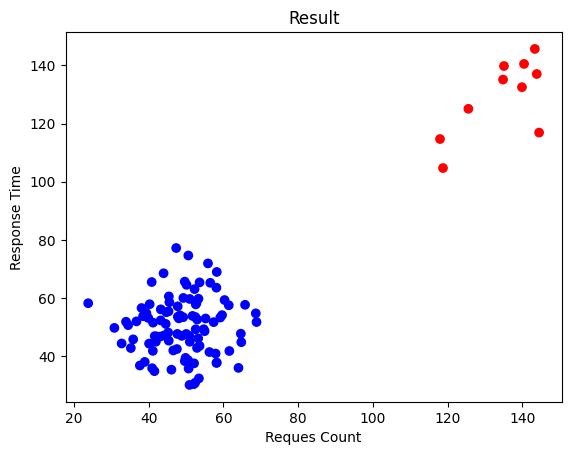

In [78]:
plt.scatter(
    traffic_df['Request Count'], traffic_df['Response Time'], 
    c=traffic_df['Anomally Score'].map({1:'blue', -1:'red'}),
    label='Traffic'
)
plt.title('Result')
plt.xlabel('Reques Count')
plt.ylabel('Response Time')

plt.show()

In [79]:
from sklearn.cluster import DBSCAN

In [80]:
dbscan = DBSCAN(eps=15, min_samples=5)

In [88]:
traffic_df['Cluster'] = dbscan.fit_predict(traffic_df)

In [89]:
print(traffic_df)

     Request Count  Response Time  Anomally Score  cluster  Cluster
0        54.967142      48.617357               1        0        0
1        56.476885      65.230299               1        0        0
2        47.658466      47.658630               1        0        0
3        65.792128      57.674347               1        0        0
4        45.305256      55.425600               1        0        0
..             ...            ...             ...      ...      ...
105     125.567120     125.075815              -1        1        1
106     139.914759     132.498197              -1        1        1
107     135.098344     139.789633              -1        1        1
108     144.500267     116.899758              -1       -1       -1
109     118.779148     104.699097              -1       -1       -1

[110 rows x 5 columns]


In [90]:
traffic_df['Anomaly'] = traffic_df['Cluster'].apply(lambda x: 'Anomaly' if x == -1 else 'Normal')

In [91]:
anomalous_data = traffic_df[traffic_df['Anomaly'] == 'Abomaly']

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
c:\project\py_project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51025 (\N{HANGUL SYLLABLE EUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\project\py_project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45813 (\N{HANGUL SYLLABLE DAB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\project\py_project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\projec

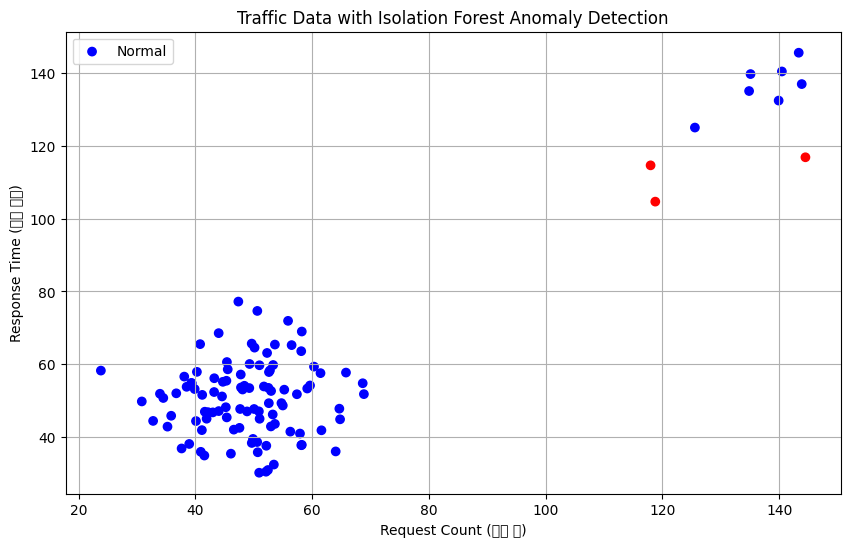

In [92]:
# 시각화
# 정상과 비정상을 다른 색으로 표시하여 트래픽 데이터 시각화
# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'
plt.figure(figsize=(10, 6))
plt.scatter(
    traffic_df["Request Count"], traffic_df["Response Time"],
    c=traffic_df['Anomaly'].map({"Normal": "blue", "Anomaly":"red"}), # 색상 매핑
    label='Traffic'
)
plt.title("Traffic Data with Isolation Forest Anomaly Detection")
plt.xlabel("Request Count (요청 수)")
plt.ylabel("Response Time (응답 시간)")
plt.legend(["Normal", "Anomaly"])

plt.grid()
plt.show()